# Modeling

## Imports

In [200]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score

In [178]:
train = pd.read_csv("../datasets/engineered_train.csv")

In [179]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,1stflr_bsmtfin1_sf
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,386425.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,581581.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,772667.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,0,0,1,0.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,0,1,0.0


## Model Selection

In [180]:
X = train[["lot_area", "1st_flr_sf", "2nd_flr_sf", "bsmtfin_sf_1", "bsmt_unf_sf", "1stflr_bsmtfin1_sf", "bsmt_full_bath", "bsmt_half_bath", "neighborhood_CollgCr", "neighborhood_Crawfor", "neighborhood_Edwards", "neighborhood_MeadowV", "neighborhood_NAmes", "neighborhood_NoRidge", "neighborhood_SWISU", "neighborhood_Sawyer", "neighborhood_SawyerW", "bsmt_qual_Ex", "bsmt_qual_Gd", "bsmt_qual_TA", "bsmt_cond_Gd", "bsmt_exposure_Av", "bsmt_exposure_Gd", "bsmtfin_type_1_GLQ", "bsmtfin_type_1_ALQ"]]
y = train["saleprice"]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [182]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

In [183]:
lr = LinearRegression()

lasso = Lasso()

ridge = Ridge()

## Cross-Validation

In [184]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7106959370473485

In [185]:
cross_val_score(lasso, X_train, y_train, cv=5).mean()

0.7108078226529517

In [186]:
cross_val_score(ridge, X_train, y_train, cv=5).mean()

0.7121472915172541

Ridge has the highest cross-validation score, so this will be the model to be trained and fit.

## Model Fitting

In [187]:
ridge.fit(X_train, y_train)

Ridge()

In [188]:
ridge.coef_

array([  3405.71265426,  36645.47650806,  29313.93003134,  29950.3853192 ,
         9252.03118587, -21949.92926218,   -491.14243141,  -1523.91560409,
          323.22622647,   1455.9391166 ,  -4993.21996261,  -4184.96054996,
        -1999.55717445,   3747.16593455,  -1581.94856023,  -1518.89978648,
        -2375.46463935,  28173.10519709,  15776.92928694,   3632.05966294,
          995.58141447,   3378.61259939,   8580.9843112 ,   4608.06412849,
          573.66107806])

In [189]:
ridge.intercept_

181262.78985035783

## Model Evaluation

In [190]:
baseline = y.mean()
baseline

181519.6868292683

Baseline indicates the actual mean of the sale prices of homes.

In [191]:
predictions = ridge.predict(X_train)

In [192]:
predictions.mean()

181262.78985035783

Prediction mean indicates the mean of the predicted sale prices of homes. $300 difference between prediction mean and baseline mean indicates that predictions are fairly close to actuals.

In [193]:
mae = metrics.mean_absolute_error(y_train, predictions)
mae

24115.70185576994

In [194]:
mse = metrics.mean_squared_error(y_train, predictions)
mse

1229626158.0019534

In [195]:
rmse = np.sqrt(mse)
rmse

35066.025694423275

RMSE of the model demonstrates that the actual sale prices are, on average, $34,160 away from the predicted sale prices found in the model.

In [197]:
ridge.score(X_train, y_train)

0.8048648883999183

In [198]:
ridge.score(X_test, y_test)

0.8045387161978138

Model is very slightly overfit, but can account for approximately 80% of the variation in the sale prices of homes in Ames. 

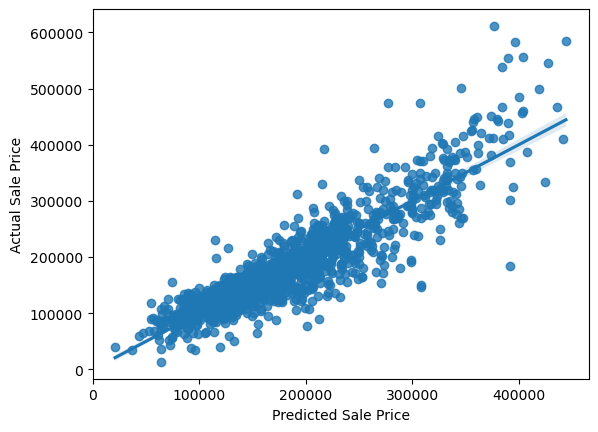

In [208]:
ax = sns.regplot(data=train, x=predictions, y=y_train)
ax.set(xlabel="Predicted Sale Price", ylabel="Actual Sale Price");

In [209]:
fig = ax.get_figure()

In [211]:
fig.savefig("../images/regplot.png")

Goodness of fit demonstrated in SNS Regplot demonstrates that more of the upper values cannot be explained by the model than the lower values, but overall fit is fairly good.

## Conclusions

Overall, the model indicates that area-related features, i.e. lot size and various square footages, were the most significant predictors of sale price. However, all of the basement-related features that made it to the final model had positive impacts, especially finished basement size and the excellent and good quality basement features, all of which had coefficients into the tens of thousands. Neighborhood data was less impactful, with the majority of neighborhoods having negative coefficients, implying that neighborhoods around ISU tended to be less desirable with the exception of College Creek, Crawford, and Northridge, which had positive coefficients.\
\
Based on the fit of the model, this could be a fairly helpful model for helping the client predict sales prices of homes based on their location and basement data, accounting for about 80% of the variation in the data.

## Kaggle Submission

In [164]:
test = pd.read_csv("../datasets/clean_test.csv")

In [165]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,1stflr_bsmtfin1_sf
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,1,0,0,0,0,0,1,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,0,1,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,367856
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,0,0,1,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,848946


In [166]:
testfeatures = ["lot_area", "1st_flr_sf", "2nd_flr_sf", "bsmtfin_sf_1", "bsmt_unf_sf", "1stflr_bsmtfin1_sf", "bsmt_full_bath", "bsmt_half_bath", "neighborhood_CollgCr", "neighborhood_Crawfor", "neighborhood_Edwards", "neighborhood_MeadowV", "neighborhood_NAmes", "neighborhood_NoRidge", "neighborhood_SWISU", "neighborhood_Sawyer", "neighborhood_SawyerW", "bsmt_qual_Ex", "bsmt_qual_Gd", "bsmt_qual_TA", "bsmt_cond_Gd", "bsmt_exposure_Av", "bsmt_exposure_Gd", "bsmtfin_type_1_GLQ", "bsmtfin_type_1_ALQ"]
X_kaggle = test[testfeatures]

In [167]:
X_kaggle = ss.transform(X_kaggle)

In [168]:
kaggle_pred = ridge.predict(X_kaggle)

In [169]:
kaggle_pred.mean()

179342.12090978166

In [170]:
submission = pd.DataFrame({
    "Id": test["id"],
    "SalePrice": kaggle_pred
})

submission.head()

,Id,SalePrice
0,2658,160489.922508
1,2718,244374.108295
2,2414,207698.475845
3,1989,111295.444624
4,625,187081.221706


In [134]:
submission.to_csv("../datasets/submission.csv", index=False)